In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [5]:
#!pip install funpymodeling

In [23]:
(pd.read_excel("data/clean_data.xlsx"))

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,segunda_planta
0,266395950,7650,94,340,4,2,0,03/12/2022,8.942592,Macul,0
1,100081302,2874,72,72,3,2,0,02/12/2022,7.963808,Estación Central,0
2,135809700,3900,59,243,3,1,2,02/12/2022,8.268988,Estación Central,0
3,500000000,14358,209,434,5,4,0,01/12/2022,9.572132,Santiago,0
4,150000000,4307,130,175,5,4,3,01/12/2022,8.368229,Peñalolén,0
...,...,...,...,...,...,...,...,...,...,...,...
5359,633778600,18200,273,450,6,4,0,21/12/2021,9.809232,Huechuraba,0
5360,367730880,10560,145,220,6,4,1,20/12/2021,9.264923,La Florida,0
5361,557168000,16000,311,2011,4,2,1,17/12/2021,9.680406,La Pintana,0
5362,348160354,9998,225,366,5,3,0,17/12/2021,9.210240,Talagante,0


In [24]:
casa_rm=pd.read_excel("data/clean_data.xlsx")

In [25]:
casa_rm

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,segunda_planta
0,266395950,7650,94,340,4,2,0,03/12/2022,8.942592,Macul,0
1,100081302,2874,72,72,3,2,0,02/12/2022,7.963808,Estación Central,0
2,135809700,3900,59,243,3,1,2,02/12/2022,8.268988,Estación Central,0
3,500000000,14358,209,434,5,4,0,01/12/2022,9.572132,Santiago,0
4,150000000,4307,130,175,5,4,3,01/12/2022,8.368229,Peñalolén,0
...,...,...,...,...,...,...,...,...,...,...,...
5359,633778600,18200,273,450,6,4,0,21/12/2021,9.809232,Huechuraba,0
5360,367730880,10560,145,220,6,4,1,20/12/2021,9.264923,La Florida,0
5361,557168000,16000,311,2011,4,2,1,17/12/2021,9.680406,La Pintana,0
5362,348160354,9998,225,366,5,3,0,17/12/2021,9.210240,Talagante,0


# Análisis exploratorio de datos depurados (EDA)

In [37]:
##https://www.kaggle.com/code/mariaalejandra01/decision-tree-random-forest-gradient-boosted-tree

In [26]:
from funpymodeling.exploratory import status
status(casa_rm).sort_values(by="q_nan", ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Precio,0,0.0,0,0.000000,1504,int64
1,UF,0,0.0,0,0.000000,1436,int64
2,m2_Construidos,0,0.0,0,0.000000,454,int64
3,m2_totales,0,0.0,0,0.000000,838,int64
4,Habitaciones,0,0.0,0,0.000000,12,int64
5,Banos,0,0.0,0,0.000000,11,int64
6,Estacionamientos,0,0.0,1673,0.311894,13,int64
7,Publi,0,0.0,0,0.000000,135,object
8,UF_log,0,0.0,0,0.000000,1436,float64
9,Comuna,0,0.0,0,0.000000,50,object


In [27]:
casa_rm.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
Precio,5364.0,327397907.0,302858692.0,34823000.0,125000000.0,196200860.0,450000000.0,1.984911e+09
UF,5364.0,9402.0,8697.0,1000.0,3589.0,5634.0,12922.0,5.700000e+04
m2_Construidos,5364.0,210.0,628.0,50.0,90.0,128.0,190.0,1.752500e+04
m2_totales,5364.0,560.0,2067.0,70.0,131.0,204.0,400.0,9.492900e+04
Habitaciones,5364.0,4.0,1.0,1.0,3.0,4.0,5.0,1.200000e+01
Banos,5364.0,3.0,1.0,1.0,2.0,2.0,3.0,1.200000e+01
Estacionamientos,5364.0,2.0,2.0,0.0,0.0,1.0,2.0,1.200000e+01
UF_log,5364.0,9.0,1.0,7.0,8.0,9.0,9.0,1.100000e+01
segunda_planta,5364.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00


In [28]:
print(casa_rm.max())

Precio              1984911000
UF                       57000
m2_Construidos           17525
m2_totales               94929
Habitaciones                12
Banos                       12
Estacionamientos            12
Publi               31/10/2022
UF_log               10.950824
Comuna                   Ñuñoa
segunda_planta               1
dtype: object


In [29]:
print("Posibles Target")
print()
print(f"UF", max(casa_rm["UF"]))
print(f"UF_log", max(casa_rm["UF_log"]))
print(f"Precio", max(casa_rm["Precio"]))



Posibles Target

UF 57000
UF_log 10.95082409052245
Precio 1984911000


In [30]:
casa_rm.columns

Index(['Precio', 'UF', 'm2_Construidos', 'm2_totales', 'Habitaciones', 'Banos',
       'Estacionamientos', 'Publi', 'UF_log', 'Comuna', 'segunda_planta'],
      dtype='object')

In [31]:
# Observamos la distribución de los datos

# Creamos Función para generar histogramas de los datos

def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(casa_rm[variable], bins = 50 , rwidth=.85)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribución de los Datos con Histograma".format(variable))
    plt.show()

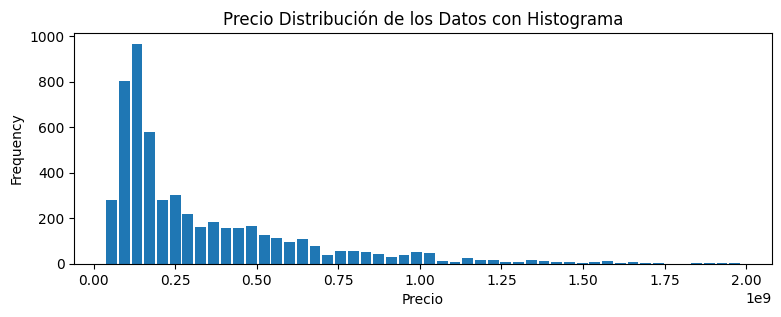

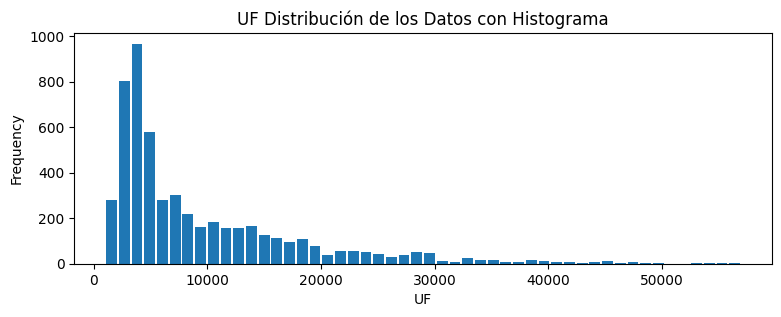

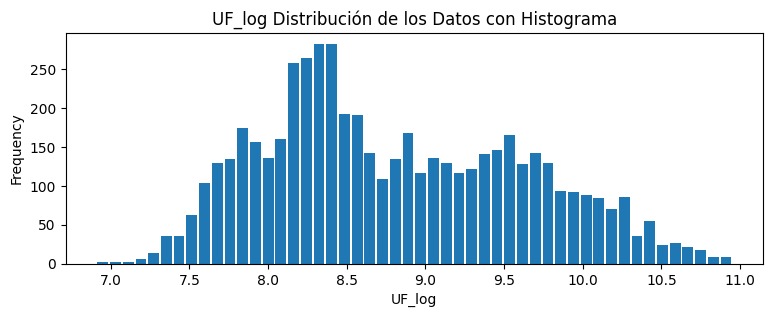

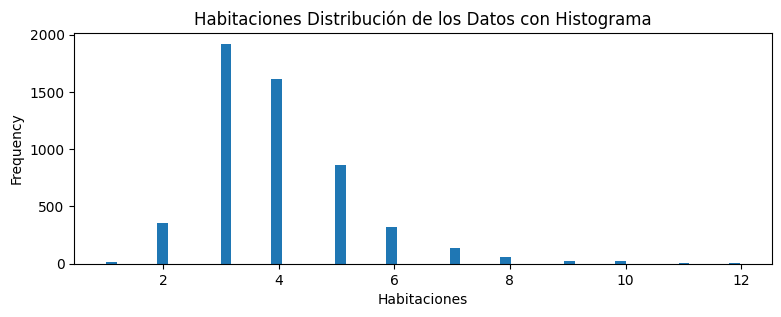

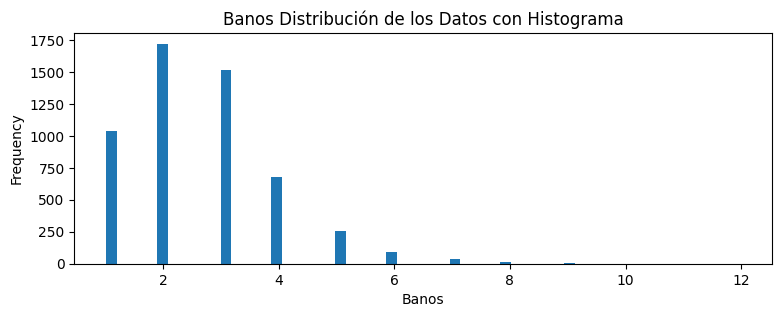

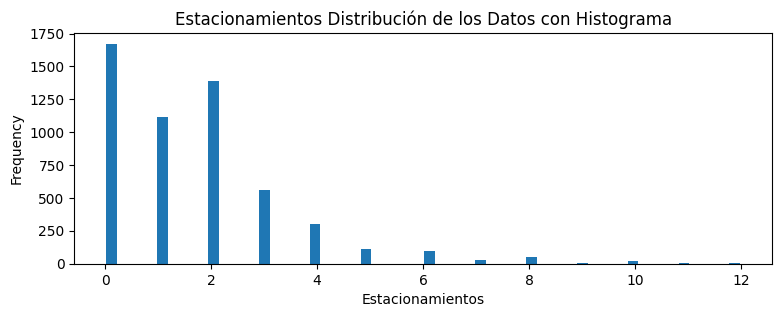

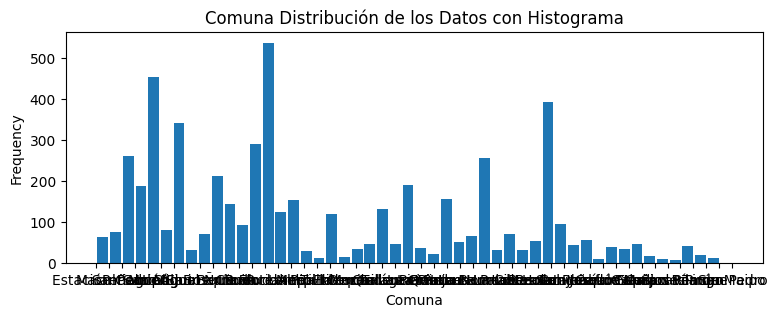

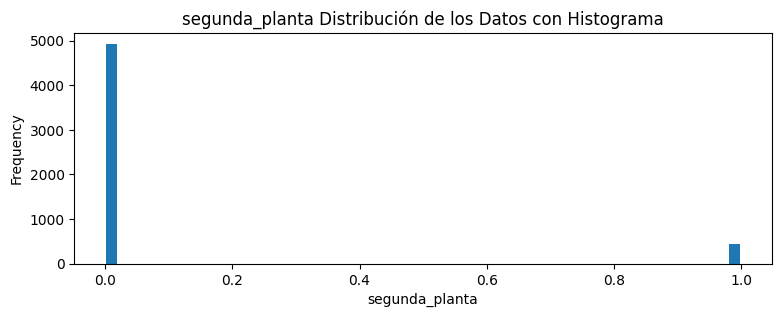

In [32]:
numero_variable =['Precio', 'UF','UF_log', 'Habitaciones', 'Banos',
       'Estacionamientos', 'Comuna', 'segunda_planta']

for n in numero_variable:
    plot_hist(n)

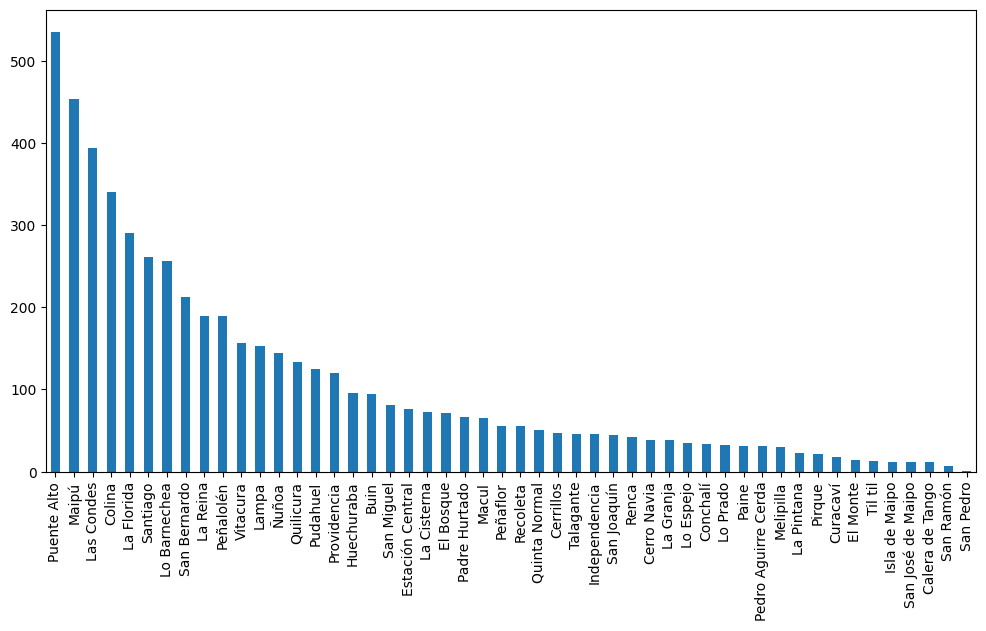

In [33]:
fig, ax = plt.subplots()
grf=casa_rm["Comuna"].value_counts().plot(ax=ax, kind='bar',figsize = (12,6))


In [34]:
# Análisis univariado en variables numéricas.

#profiling_num: perfilado de datos numéricos Se otiene una tabla de métricas con varios indicadores para todas las variables numéricas, 
#omitiendo automáticamente las variables no numéricas. Las métricas actuales son:
# media, std_dev: desviación estándar, todo el p_XX: percentil en el número XX, variación_coef: la relación de sd/mean, 
# range_99 es el límite para el cual el 99.

from funpymodeling.exploratory import profiling_num

profiling_num(casa_rm).round(decimals=1)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Precio,327397907.0,302858691.7,0.9,55000000.0,73000000.0,125000000.0,196200860.0,450000000.0,975044000.0,1.462566e+09
1,UF,9401.6,8697.2,0.9,1579.0,2096.0,3589.0,5634.0,12922.0,28000.0,4.200000e+04
2,m2_Construidos,209.9,627.5,3.0,51.0,62.0,90.0,128.0,190.0,420.0,1.000000e+03
3,m2_totales,559.6,2066.5,3.7,72.0,81.0,131.0,204.0,400.0,1614.4,5.318500e+03
4,Habitaciones,4.0,1.4,0.4,2.0,2.0,3.0,4.0,5.0,6.0,9.000000e+00
5,Banos,2.6,1.3,0.5,1.0,1.0,2.0,2.0,3.0,5.0,6.000000e+00
6,Estacionamientos,1.7,1.7,1.1,0.0,0.0,0.0,1.0,2.0,5.0,8.000000e+00
7,UF_log,8.8,0.8,0.1,7.4,7.6,8.2,8.6,9.5,10.2,1.060000e+01
8,segunda_planta,0.1,0.3,3.4,0.0,0.0,0.0,0.0,0.0,1.0,1.000000e+00


### Analisis de la variable UF ( Target)


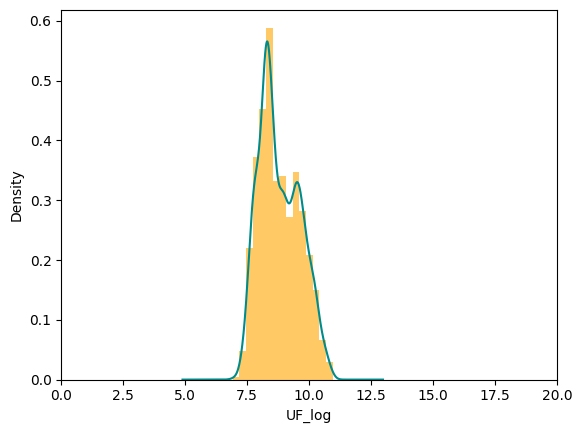

El precio de la  media registrada es:  8.801063038219672

La mediana es: 8.636751859602

El precio mínima es:  6.90875477931522

El precio máxima es:  10.95082409052245



In [35]:
ax = casa_rm["UF_log"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
casa_rm["UF_log"].plot(kind='density', color='darkcyan')
ax.set(xlabel='UF_log')
plt.xlim(0,20)
plt.show()

# Precio 
print("El precio de la  media registrada es: ",casa_rm["UF_log"].mean(skipna=True))
print("")
print("La mediana es:",casa_rm["UF_log"].median(skipna=True))
print("")
print("El precio mínima es: ",casa_rm["UF_log"].min(skipna=True))
print("")
print("El precio máxima es: ",casa_rm["UF_log"].max(skipna=True))
print("")

Text(0.5, 1.0, 'Distribución Precio en UF')

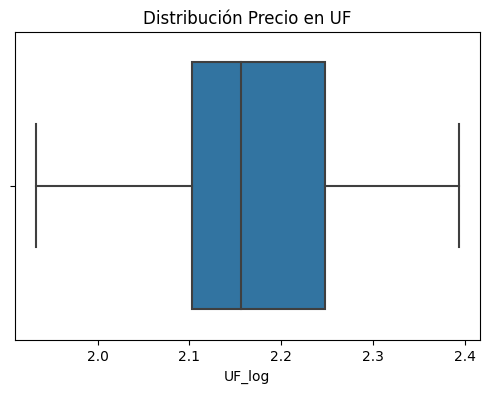

In [36]:
fig=plt.figure(figsize=(6,4))
ax=sns.boxplot(np.log(casa_rm["UF_log"]))
ax.set_title('Distribución Precio en UF')

C:\Users\diazb\AppData\Local\Temp\ipykernel_5472\1916929149.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(casa_rm.corr(), annot=True)


<AxesSubplot: >

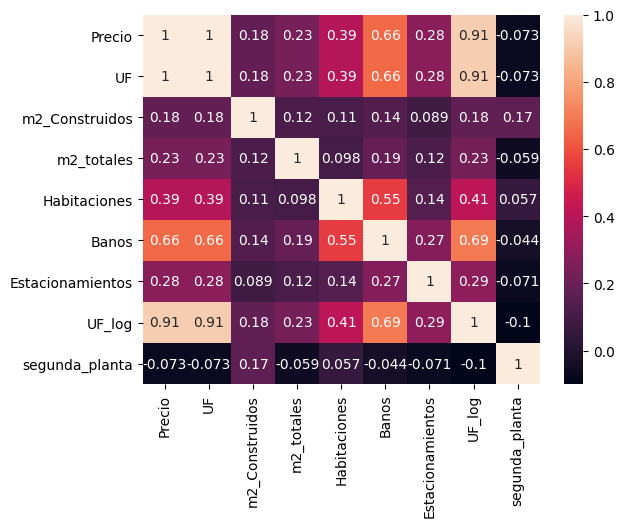

In [37]:
sns.heatmap(casa_rm.corr(), annot=True)

___
___
___

# Union de Dataframe




In [159]:
#!pip install pandas openpyxl

In [38]:
pd.read_excel("data/numero.xlsx")

,Comuna,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,Distancia a Educación Inicial (m),Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica,Número de establecimientos eduacion basica,Número de establecimientos privados,Distancia a Educación Basica (m),...,Víctimas Robo por Sorpresa,Número de denuncias por delito en el espacio público cada 100 habitantes,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
0,Santiago,402847,1868007.66,314094.72,94,389.63,2.16,77,11,384.80,...,4045,2.02,59.57,9.63,10.62,3.37,14405,589.23,48.24,85
1,Cerrillos,80710,1176964.65,305502.19,44,349.78,1.05,20,0,733.70,...,216,1.38,40.00,27.42,8.70,2.35,1847,693.22,9.28,90
2,Cerro Navia,132401,786372.48,291964.59,63,278.31,0.93,34,0,362.07,...,123,0.82,19.00,34.64,12.84,4.48,4872,510.54,2.75,110
3,Conchalí,126800,417852.00,340860.35,66,308.24,1.38,36,1,361.62,...,262,1.24,25.00,29.37,10.44,4.46,4409,681.45,4.79,80
4,El Bosque,162415,329261.04,280109.16,103,294.30,1.47,49,1,382.68,...,234,0.94,32.56,22.65,10.22,2.61,4084,641.95,4.71,105
5,Estación Central,140746,533763.86,297521.89,68,328.11,1.37,29,1,441.76,...,1330,1.84,52.94,23.45,11.87,4.20,5574,672.85,10.19,100
6,Huechuraba,98500,1061523.43,299286.88,30,795.39,0.50,13,6,1331.51,...,181,0.87,18.00,28.84,8.08,2.64,2331,690.32,1.96,90
7,Independencia,100059,155440.97,126954.77,33,359.21,1.50,25,3,360.06,...,306,1.05,18.00,20.91,13.56,4.37,4403,661.70,7.64,90
8,La Cisterna,89889,160366.50,128427.75,50,330.55,1.94,34,2,402.71,...,286,1.43,75.00,17.82,6.35,2.13,1800,707.29,1.98,90
9,La Florida,366376,1375949.93,1159154.11,182,427.54,1.32,107,13,556.75,...,736,0.89,57.58,18.99,5.59,2.12,6098,810.97,15.28,90


In [39]:
variables=pd.read_excel("data/numero.xlsx")

In [40]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 32 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      48 non-null     object 
 1   Poblacion total 2020                                                                        48 non-null     int64  
 2   Superficie de Área Verde m²                                                                 48 non-null     float64
 3   Superficie Plazas m²                                                                        48 non-null     float64
 4   Número de establecimientos educacion inicial                                                48 non-null     int64  
 5   Distancia a Educación Inicial (m)            

In [41]:
status(variables).sort_values(by="q_nan", ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Comuna,0,0.0,0,0.000000,48,object
1,Poblacion total 2020,0,0.0,0,0.000000,48,int64
30,Longitud ciclovías (km),0,0.0,1,0.020833,48,float64
29,Tasa de conexiones residenciales fijas de inte...,0,0.0,0,0.000000,48,float64
28,Requerimiento de viviendas nuevas urbanas,0,0.0,0,0.000000,48,int64
27,Porcentaje de viviendas con situación de alleg...,0,0.0,0,0.000000,43,float64
26,Porcentaje de Hacinamiento,0,0.0,0,0.000000,47,float64
25,Porcentaje de la población en situación de po...,0,0.0,0,0.000000,48,float64
24,Porcentaje de unidades vecinales que tienen e...,0,0.0,1,0.020833,34,float64
23,Número de denuncias por delito en el espacio ...,0,0.0,0,0.000000,39,float64


In [42]:
variables.columns

Index(['Comuna', 'Poblacion total 2020', 'Superficie de Área Verde m²',
       'Superficie Plazas m²', 'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
       'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',
       'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de residuos municipales valorizados',
       ' Porcentaje de viviendas en mal estado  y/o carente  servicios básicos',
       'Porcentaje de participaci

In [43]:
casa_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5364 entries, 0 to 5363
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Precio            5364 non-null   int64  
 1   UF                5364 non-null   int64  
 2   m2_Construidos    5364 non-null   int64  
 3   m2_totales        5364 non-null   int64  
 4   Habitaciones      5364 non-null   int64  
 5   Banos             5364 non-null   int64  
 6   Estacionamientos  5364 non-null   int64  
 7   Publi             5364 non-null   object 
 8   UF_log            5364 non-null   float64
 9   Comuna            5364 non-null   object 
 10  segunda_planta    5364 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 461.1+ KB


In [44]:
casa_rm.columns


Index(['Precio', 'UF', 'm2_Construidos', 'm2_totales', 'Habitaciones', 'Banos',
       'Estacionamientos', 'Publi', 'UF_log', 'Comuna', 'segunda_planta'],
      dtype='object')

In [45]:
casa_rm.head(10)

,Precio,UF,m2_Construidos,m2_totales,Habitaciones,Banos,Estacionamientos,Publi,UF_log,Comuna,segunda_planta
0,266395950,7650,94,340,4,2,0,03/12/2022,8.942592,Macul,0
1,100081302,2874,72,72,3,2,0,02/12/2022,7.963808,Estación Central,0
2,135809700,3900,59,243,3,1,2,02/12/2022,8.268988,Estación Central,0
3,500000000,14358,209,434,5,4,0,01/12/2022,9.572132,Santiago,0
4,150000000,4307,130,175,5,4,3,01/12/2022,8.368229,Peñalolén,0
5,85000000,2440,55,121,2,1,2,01/12/2022,7.800163,Maipú,0
6,470110500,13500,237,594,6,5,2,01/12/2022,9.510519,San Miguel,0
7,250029140,7180,120,420,3,3,2,01/12/2022,8.879194,Colina,0
8,198000000,5685,180,120,7,3,2,01/12/2022,8.645762,Estación Central,1
9,62000000,1780,65,70,3,1,0,01/12/2022,7.484930,Pedro Aguirre Cerda,0


## Cambiamos el orden de la columnas para favorecer el cruce de datos con el dataframe variables

In [46]:
casa_rm = casa_rm[['Comuna','m2_Construidos', 'm2_totales', 'Habitaciones', 'Banos', "segunda_planta",
       'Estacionamientos', 'Publi','Precio', 'UF',"UF_log"]] 
       # cambiamos el orden de la columnas para favorecer el cruce de datos con el dataframe variables


In [47]:
casa_rm.columns # comprobamos

Index(['Comuna', 'm2_Construidos', 'm2_totales', 'Habitaciones', 'Banos',
       'segunda_planta', 'Estacionamientos', 'Publi', 'Precio', 'UF',
       'UF_log'],
      dtype='object')

In [65]:
casa_rm["Comuna"].unique().shape

(50,)

In [48]:
casa_rm["Comuna"].unique()

array(['Macul', 'Estación Central', 'Santiago', 'Peñalolén', 'Maipú',
       'San Miguel', 'Colina', 'Pedro Aguirre Cerda', 'El Bosque',
       'San Bernardo', 'Ñuñoa', 'Buin', 'La Florida', 'Puente Alto',
       'Pudahuel', 'Lampa', 'Melipilla', 'Til til', 'Providencia',
       'El Monte', 'Conchalí', 'Independencia', 'Quilicura', 'Talagante',
       'La Reina', 'La Granja', 'La Pintana', 'Vitacura', 'Quinta Normal',
       'Padre Hurtado', 'Lo Barnechea', 'Paine', 'La Cisterna',
       'Lo Prado', 'Recoleta', 'Las Condes', 'Huechuraba', 'San Joaquín',
       'Peñaflor', 'San José de Maipo', 'Cerro Navia', 'Lo Espejo',
       'Cerrillos', 'Curacaví', 'Calera de Tango', 'San Ramón', 'Renca',
       'Pirque', 'Isla de Maipo', 'San Pedro'], dtype=object)

In [49]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 32 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      48 non-null     object 
 1   Poblacion total 2020                                                                        48 non-null     int64  
 2   Superficie de Área Verde m²                                                                 48 non-null     float64
 3   Superficie Plazas m²                                                                        48 non-null     float64
 4   Número de establecimientos educacion inicial                                                48 non-null     int64  
 5   Distancia a Educación Inicial (m)            

## Pasamos la columna comuna a indice para facilitar la union con el fdataframe principal casa_rm

In [50]:
variables.set_index("Comuna",inplace=True) 

In [51]:
variables

,Poblacion total 2020,Superficie de Área Verde m²,Superficie Plazas m²,Número de establecimientos educacion inicial,Distancia a Educación Inicial (m),Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica,Número de establecimientos eduacion basica,Número de establecimientos privados,Distancia a Educación Basica (m),Número de establecimientos atencion primaria,...,Víctimas Robo por Sorpresa,Número de denuncias por delito en el espacio público cada 100 habitantes,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
Comuna,,,,,,,,,,,,,,,,,,,,,
Santiago,402847,1868007.66,314094.72,94,389.63,2.16,77,11,384.80,7,...,4045,2.02,59.57,9.63,10.62,3.37,14405,589.23,48.24,85
Cerrillos,80710,1176964.65,305502.19,44,349.78,1.05,20,0,733.70,4,...,216,1.38,40.00,27.42,8.70,2.35,1847,693.22,9.28,90
Cerro Navia,132401,786372.48,291964.59,63,278.31,0.93,34,0,362.07,8,...,123,0.82,19.00,34.64,12.84,4.48,4872,510.54,2.75,110
Conchalí,126800,417852.00,340860.35,66,308.24,1.38,36,1,361.62,9,...,262,1.24,25.00,29.37,10.44,4.46,4409,681.45,4.79,80
El Bosque,162415,329261.04,280109.16,103,294.30,1.47,49,1,382.68,10,...,234,0.94,32.56,22.65,10.22,2.61,4084,641.95,4.71,105
Estación Central,140746,533763.86,297521.89,68,328.11,1.37,29,1,441.76,6,...,1330,1.84,52.94,23.45,11.87,4.20,5574,672.85,10.19,100
Huechuraba,98500,1061523.43,299286.88,30,795.39,0.50,13,6,1331.51,5,...,181,0.87,18.00,28.84,8.08,2.64,2331,690.32,1.96,90
Independencia,100059,155440.97,126954.77,33,359.21,1.50,25,3,360.06,4,...,306,1.05,18.00,20.91,13.56,4.37,4403,661.70,7.64,90
La Cisterna,89889,160366.50,128427.75,50,330.55,1.94,34,2,402.71,4,...,286,1.43,75.00,17.82,6.35,2.13,1800,707.29,1.98,90


# Unimos nuestras bases datos

In [53]:
union = casa_rm.join(variables, on=["Comuna"], how="inner")
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 0 to 5174
Data columns (total 42 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      5298 non-null   object 
 1   m2_Construidos                                                                              5298 non-null   int64  
 2   m2_totales                                                                                  5298 non-null   int64  
 3   Habitaciones                                                                                5298 non-null   int64  
 4   Banos                                                                                       5298 non-null   int64  
 5   segunda_planta                           

In [54]:
union["Comuna"].unique()

array(['Macul', 'Estación Central', 'Santiago', 'Peñalolén', 'Maipú',
       'San Miguel', 'Colina', 'Pedro Aguirre Cerda', 'El Bosque',
       'San Bernardo', 'Ñuñoa', 'Buin', 'La Florida', 'Puente Alto',
       'Pudahuel', 'Lampa', 'Melipilla', 'Providencia', 'El Monte',
       'Conchalí', 'Independencia', 'Quilicura', 'Talagante', 'La Reina',
       'La Granja', 'La Pintana', 'Vitacura', 'Quinta Normal',
       'Padre Hurtado', 'Lo Barnechea', 'Paine', 'La Cisterna',
       'Lo Prado', 'Recoleta', 'Las Condes', 'Huechuraba', 'San Joaquín',
       'Peñaflor', 'Cerro Navia', 'Lo Espejo', 'Cerrillos', 'San Ramón',
       'Renca', 'Pirque'], dtype=object)

In [55]:
casa_rm["Comuna"].unique().shape

(50,)

In [56]:
union["Comuna"].unique().shape # faltan las comunas de til til, san jose de maipo, curacavi, Isla de maipo, San pedro, Calera de Tango

(44,)

In [57]:
union.head(10)

,Comuna,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Publi,Precio,UF,...,Víctimas Robo por Sorpresa,Número de denuncias por delito en el espacio público cada 100 habitantes,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
0,Macul,94,340,4,2,0,0,03/12/2022,266395950,7650,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
66,Macul,128,128,2,1,0,1,22/11/2022,110000000,3158,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
85,Macul,144,221,4,2,0,3,21/11/2022,262913650,7550,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
105,Macul,81,160,3,1,0,3,10/11/2022,125000000,3589,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
233,Macul,321,249,7,7,1,2,03/12/2022,350911371,10077,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
295,Macul,117,290,3,2,0,0,02/12/2022,292513200,8400,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
316,Macul,70,205,3,1,0,0,02/12/2022,380000000,10912,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
449,Macul,85,250,3,1,0,2,02/12/2022,132327400,3800,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
692,Macul,108,108,2,2,0,1,01/12/2022,184561900,5300,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90
747,Macul,117,293,3,2,0,2,01/12/2022,282066300,8100,...,256,0.86,66.67,13.47,5.97,2.49,2523,713.77,6.81,90


In [58]:
union.columns

Index(['Comuna', 'm2_Construidos', 'm2_totales', 'Habitaciones', 'Banos',
       'segunda_planta', 'Estacionamientos', 'Publi', 'Precio', 'UF', 'UF_log',
       'Poblacion total 2020', 'Superficie de Área Verde m²',
       'Superficie Plazas m²', 'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
       'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',
       'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de resid

In [59]:
union.corr()

C:\Users\diazb\AppData\Local\Temp\ipykernel_5472\2198893341.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  union.corr()


,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Precio,UF,UF_log,Poblacion total 2020,...,Víctimas Robo por Sorpresa,Número de denuncias por delito en el espacio público cada 100 habitantes,Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables,Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF),Porcentaje de Hacinamiento,Porcentaje de viviendas con situación de allegamiento externo,Requerimiento de viviendas nuevas urbanas,Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares,Longitud ciclovías (km),Tiempo de viaje en trans publico hr punta
m2_Construidos,1.000000,0.139675,0.121739,0.147241,0.157585,0.087308,0.192157,0.192156,0.182995,-0.101502,...,-0.040965,-0.082166,-0.061067,-0.018737,-0.019348,-0.063680,-0.094327,-0.106680,-0.036421,-0.006433
m2_totales,0.139675,1.000000,0.108757,0.211112,-0.063699,0.153858,0.268113,0.268111,0.255390,-0.115618,...,-0.043304,-0.111577,-0.075609,-0.009022,-0.027269,-0.092014,-0.110031,-0.068631,-0.027416,-0.038850
Habitaciones,0.121739,0.108757,1.000000,0.551363,0.057957,0.148439,0.387083,0.387075,0.410750,-0.127456,...,0.040066,0.017016,-0.132511,-0.177470,-0.117639,-0.009964,-0.073945,0.022753,0.050655,-0.244699
Banos,0.147241,0.211112,0.551363,1.000000,-0.046209,0.273014,0.658286,0.658286,0.692474,-0.188174,...,-0.095210,-0.247160,-0.243941,-0.220298,-0.294198,-0.262407,-0.235582,0.126925,0.016838,-0.306635
segunda_planta,0.157585,-0.063699,0.057957,-0.046209,1.000000,-0.074260,-0.072875,-0.072880,-0.100744,0.071004,...,0.054475,0.044210,0.032779,0.025954,0.061239,0.044822,0.082981,-0.025165,0.038631,0.047492
Estacionamientos,0.087308,0.153858,0.148439,0.273014,-0.074260,1.000000,0.285568,0.285569,0.299668,-0.092953,...,-0.066203,-0.130155,-0.081991,-0.069210,-0.113741,-0.126963,-0.122553,0.039433,-0.017783,-0.100371
Precio,0.192157,0.268113,0.387083,0.658286,-0.072875,0.285568,1.000000,1.000000,0.913832,-0.277167,...,-0.126577,-0.308966,-0.417899,-0.431230,-0.497057,-0.375047,-0.359617,0.226070,0.051365,-0.487637
UF,0.192156,0.268111,0.387075,0.658286,-0.072880,0.285569,1.000000,1.000000,0.913839,-0.277169,...,-0.126560,-0.308958,-0.417896,-0.431236,-0.497054,-0.375046,-0.359609,0.226066,0.051373,-0.487645
UF_log,0.182995,0.255390,0.410750,0.692474,-0.100744,0.299668,0.913832,0.913839,1.000000,-0.306228,...,-0.105425,-0.270967,-0.389720,-0.468826,-0.504626,-0.361052,-0.361380,0.243650,0.072978,-0.570703
Poblacion total 2020,-0.101502,-0.115618,-0.127456,-0.188174,0.071004,-0.092953,-0.277167,-0.277169,-0.306228,1.000000,...,0.435983,0.081136,0.373877,-0.097108,-0.097072,-0.123734,0.739670,0.440710,0.597976,0.156084


In [60]:
correlacion = union.corr()

C:\Users\diazb\AppData\Local\Temp\ipykernel_5472\1267003942.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = union.corr()


In [61]:
correlacion["UF"].sort_values(ascending=False)

UF                                                                                            1.000000
Precio                                                                                        1.000000
UF_log                                                                                        0.913839
 Consumo Per Capita residencial (Kwh/persona)                                                 0.700947
Banos                                                                                         0.658286
Distancia a Educación Inicial (m)                                                             0.601220
Distancia a Educación Basica (m)                                                              0.584681
Número de establecimientos privados                                                           0.554031
Distancia a Centro de Salud (m)                                                               0.467177
Habitaciones                                                             

# Utilizaremos como target UF_log

In [62]:
cols_to_plot1= ['UF_log',
       'Poblacion total 2020', 'Superficie de Área Verde m²',
       'Superficie Plazas m²',
      ]

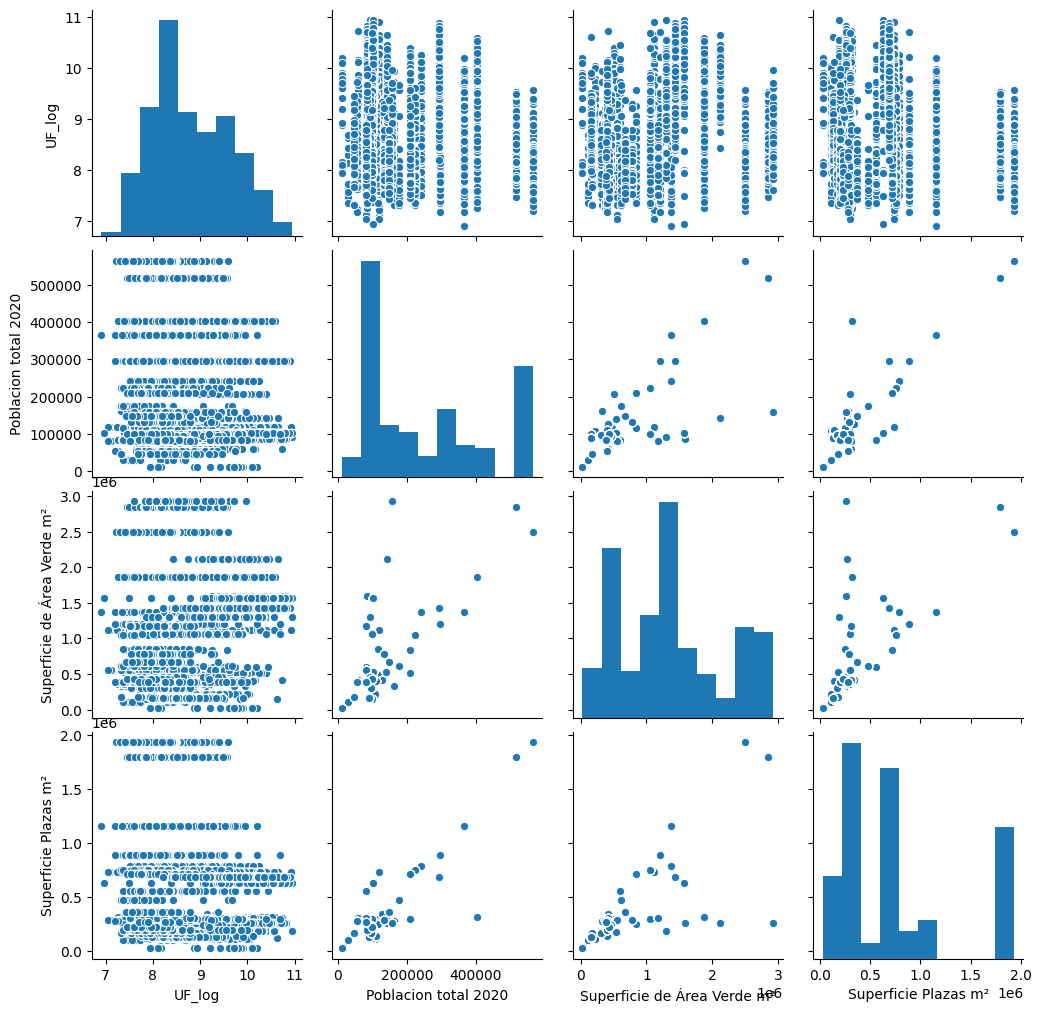

In [63]:
sns.pairplot(union[cols_to_plot1])

<AxesSubplot: >

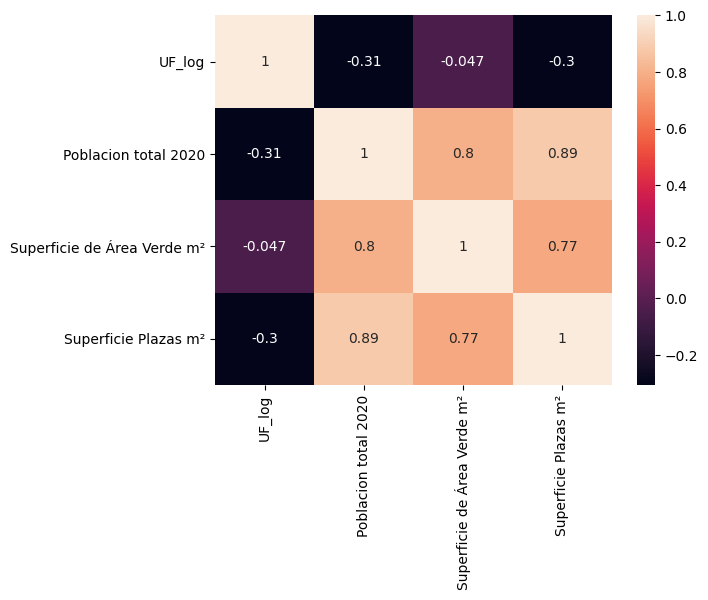

In [64]:
sns.heatmap(union[cols_to_plot1].corr(), annot=True)

In [66]:
# Educacion
cols_to_plot2= ['UF_log',
       'Número de establecimientos educacion inicial',
       'Distancia a Educación Inicial (m)',
       'Razón entre disponibilidad efectiva de matrículas y demanda potencial por educación básica',
       'Número de establecimientos eduacion basica',
       'Número de establecimientos privados',
       'Distancia a Educación Basica (m)',
      ]

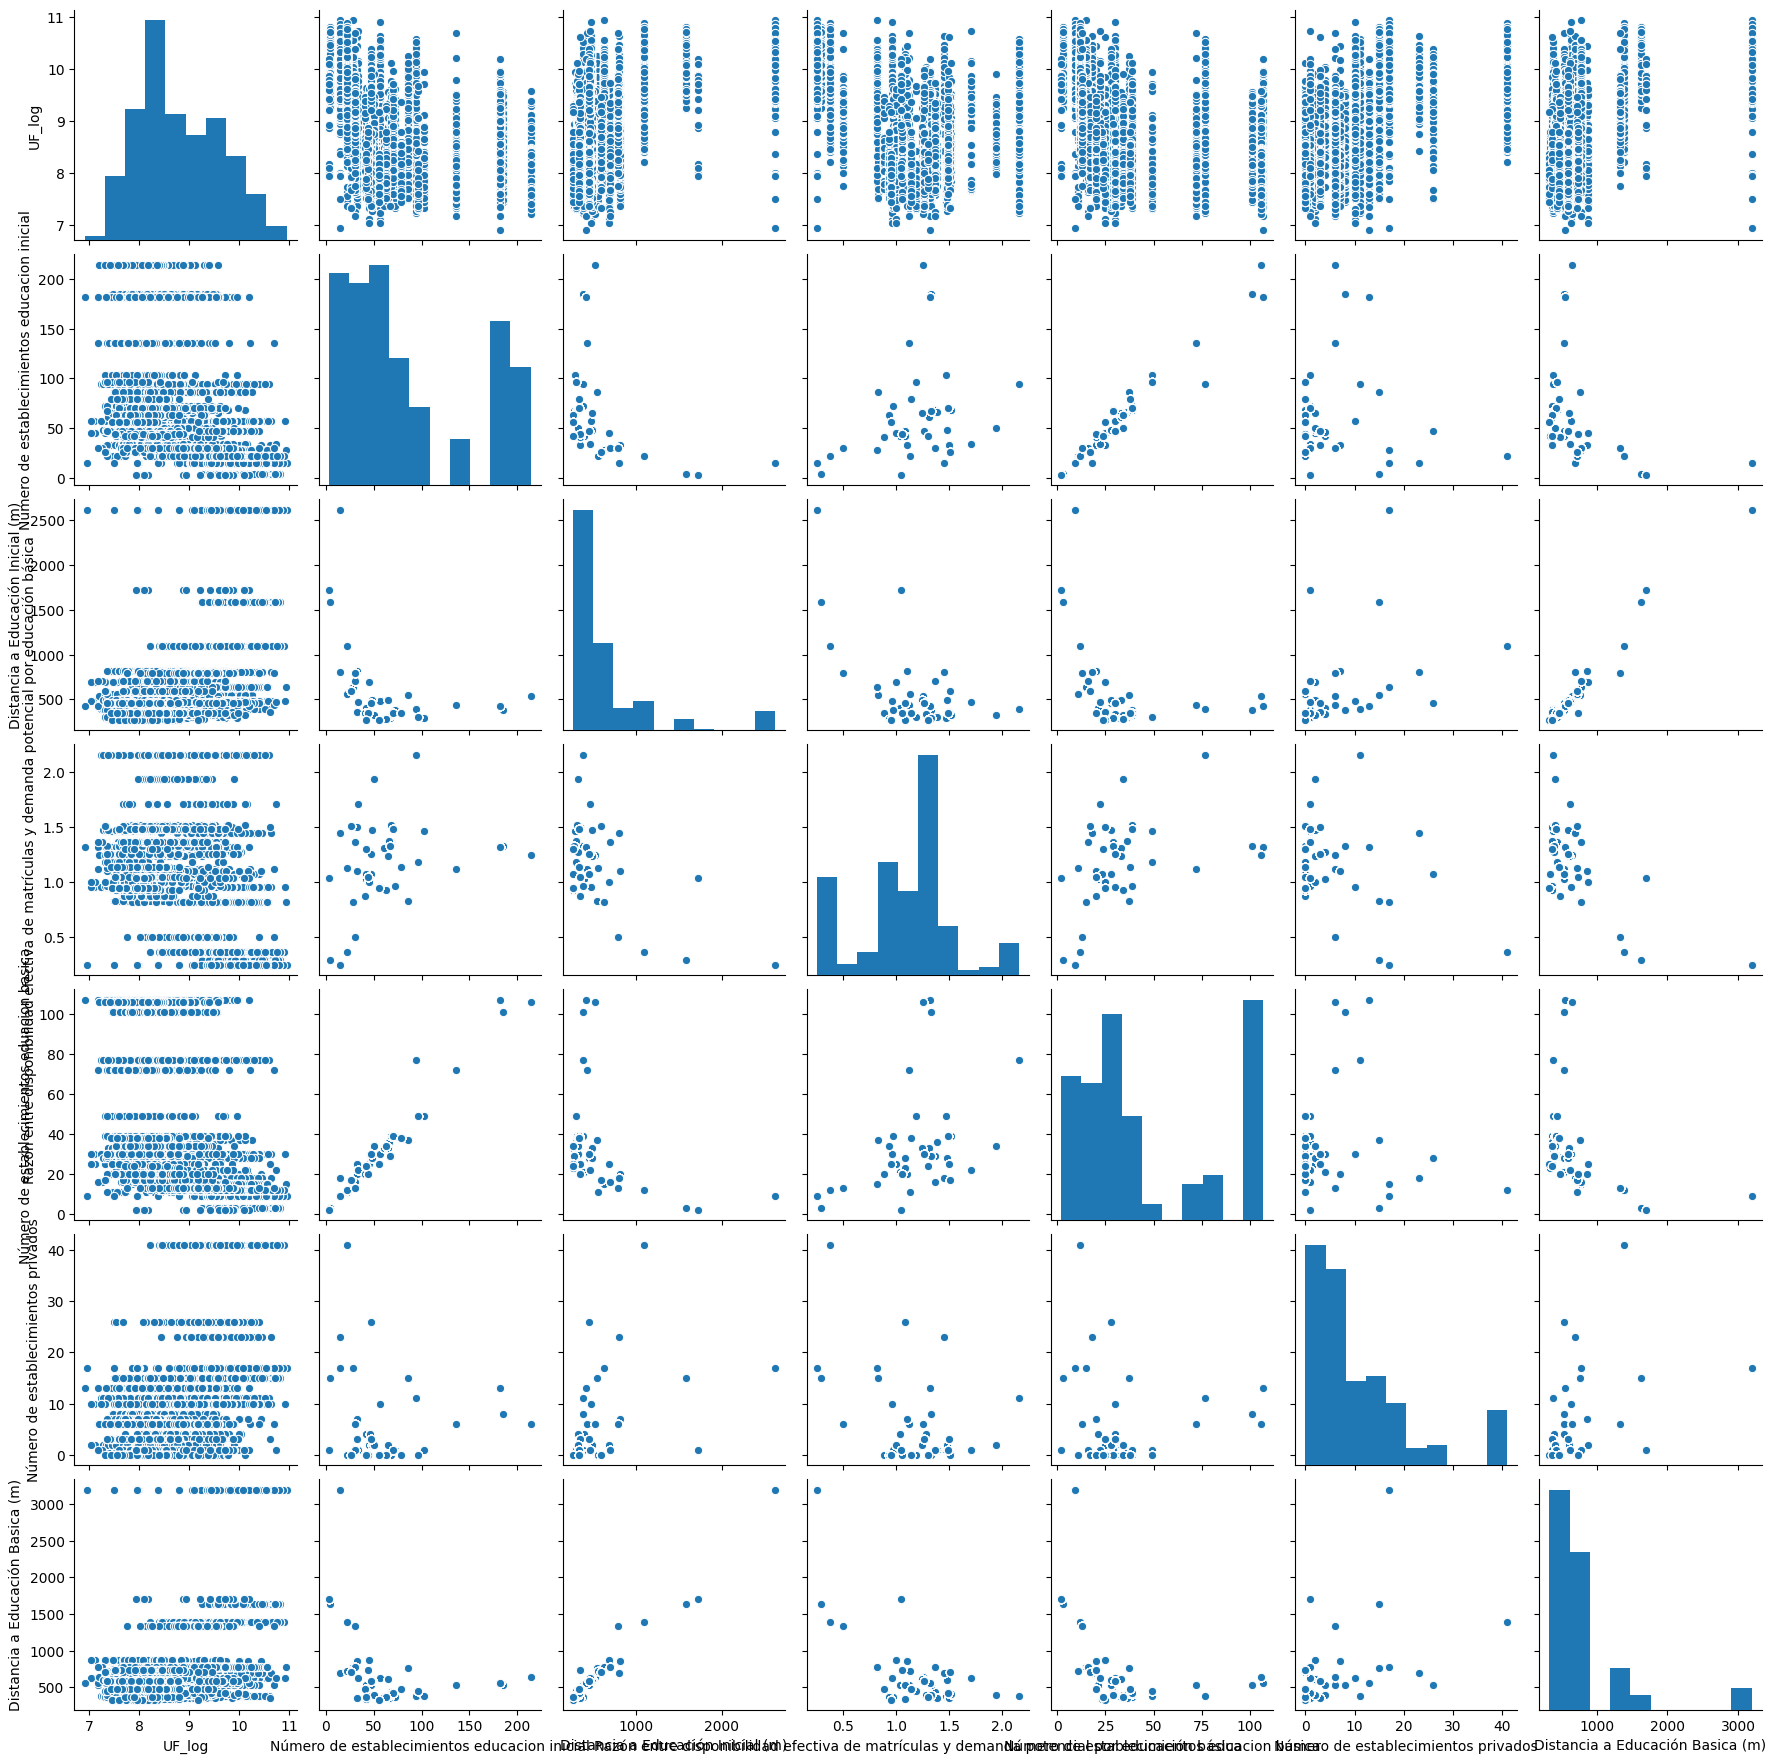

In [67]:
sns.pairplot(union[cols_to_plot2])

<AxesSubplot: >

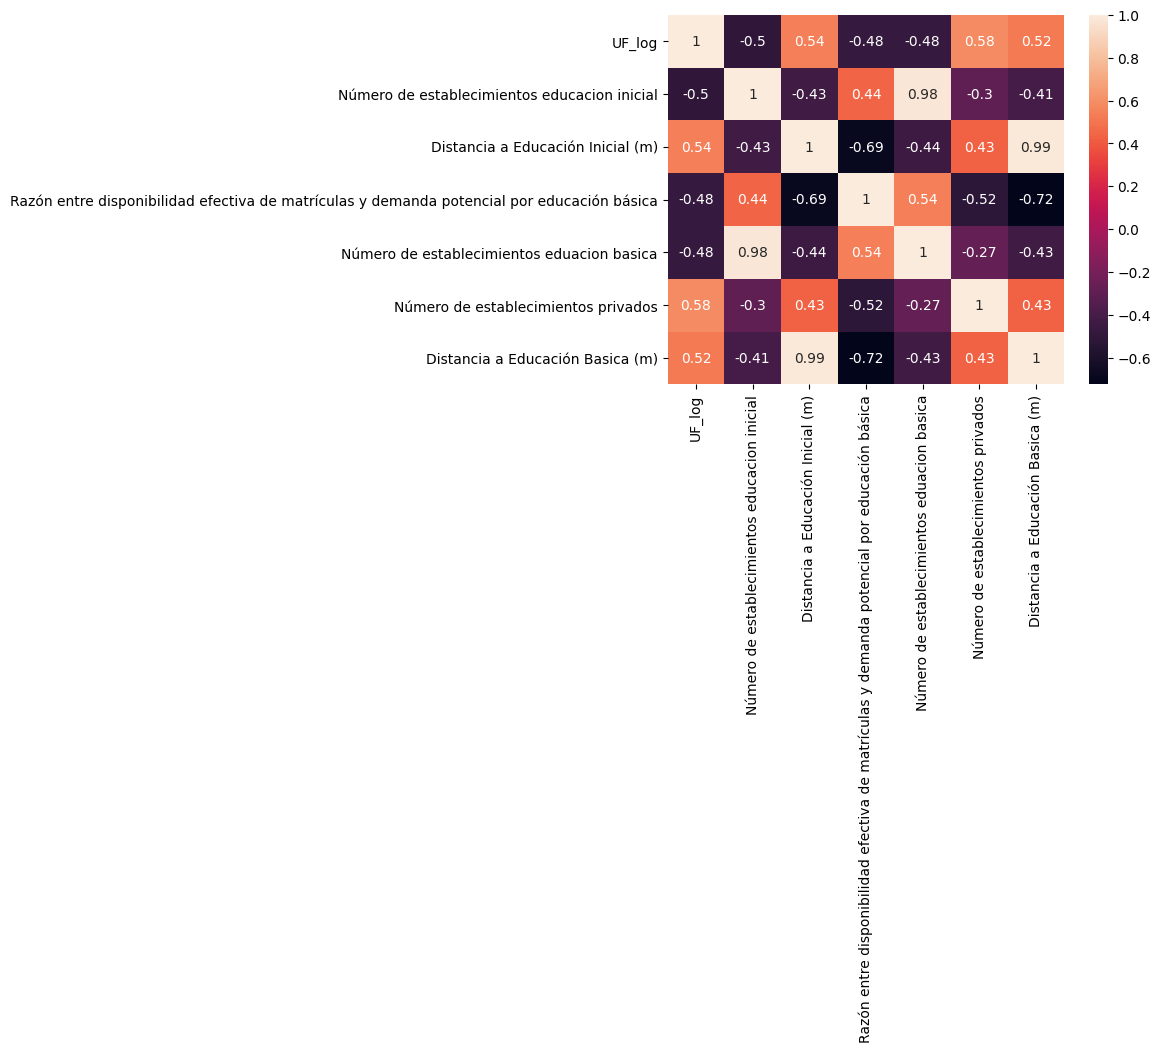

In [188]:
sns.heatmap(union[cols_to_plot2].corr(), annot=True)

<AxesSubplot: >

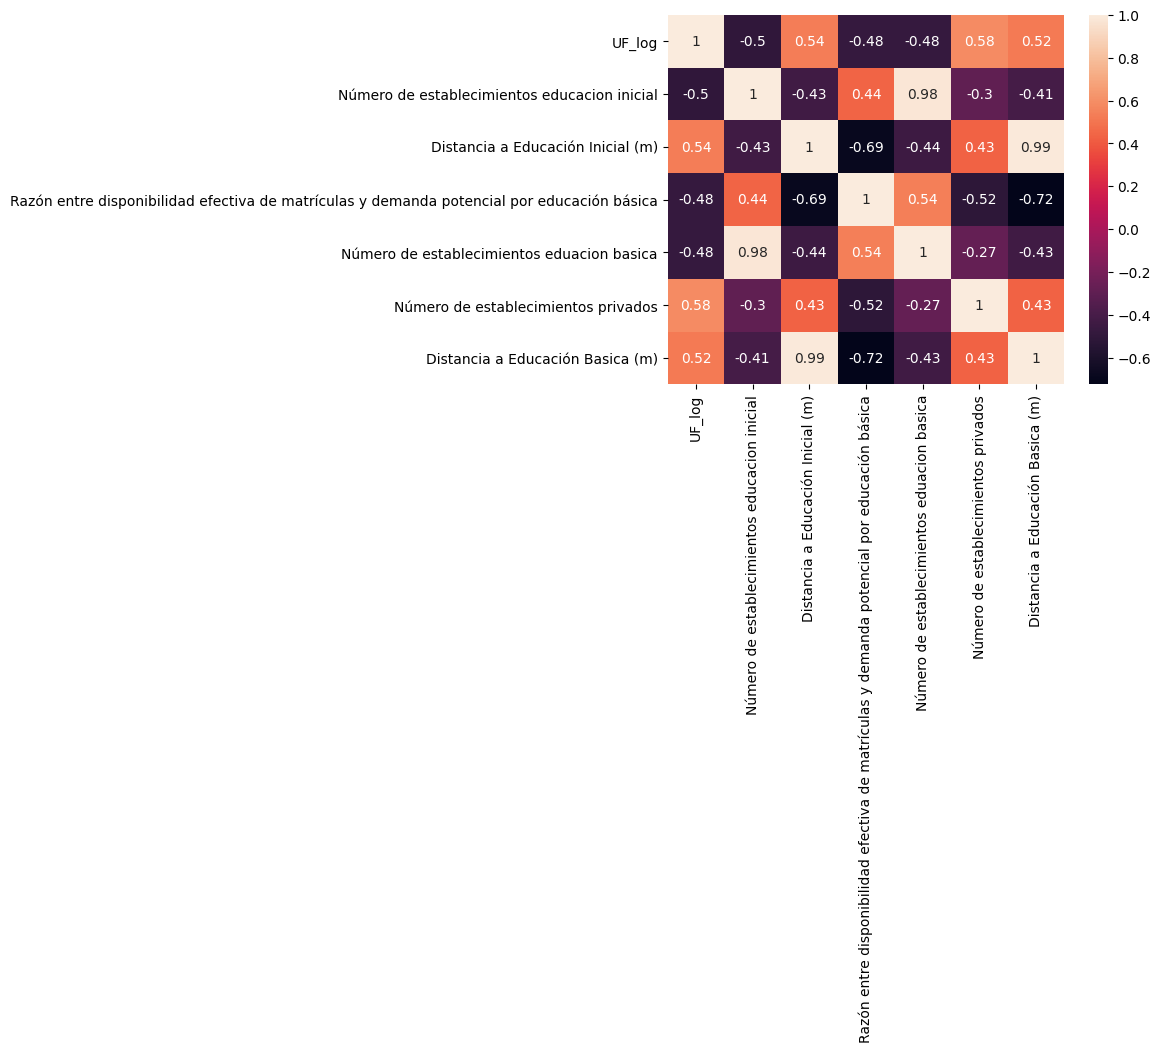

In [68]:
sns.heatmap(union[cols_to_plot2].corr(), annot=True)# del siguiente gráfico podriamos tomar la decisión de eliminar núm de establecimiento edu inicial(pre-escolar) o num de establ de educ básica(primaria) y las distancias de ambas 

In [69]:
cols_to_plot3=["UF_log",'Número de establecimientos atencion primaria',
       'Distancia a Centro de Salud (m)',
       'Superficie total de campamentos (ha)',
       ' luminarias cada 50 metros lineales ',
       ' Consumo Per Capita residencial (Kwh/persona)',
       'Fallos suministro electrico',]

<AxesSubplot: >

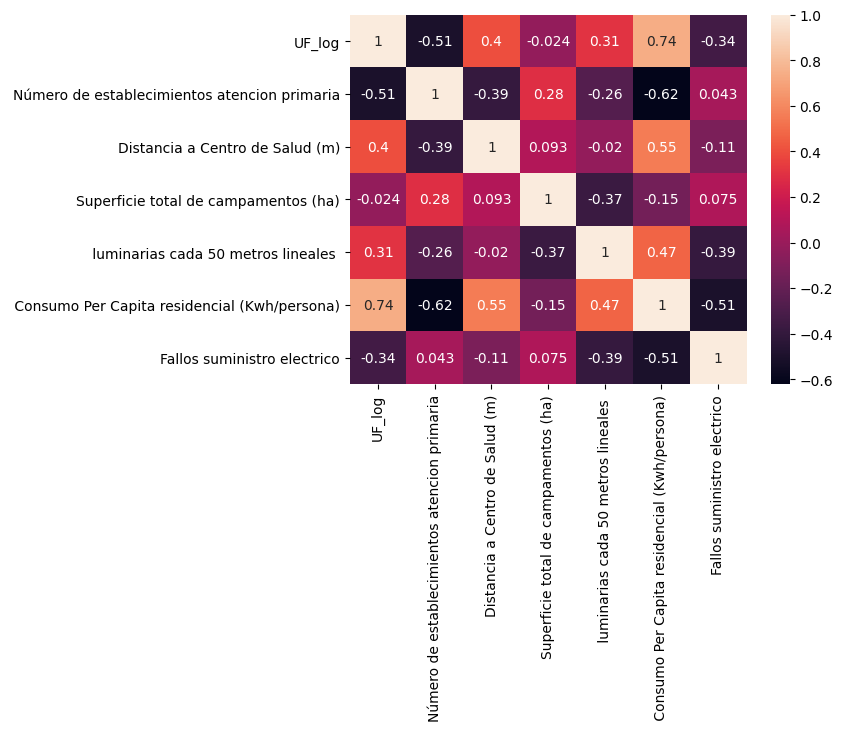

In [70]:
sns.heatmap(union[cols_to_plot3].corr(), annot=True)

In [71]:
cols_to_plot4=["UF_log",'porcentaje manzanas con veredas con buena calidad de pavimento',
       'Total de residuos (t)',
       ' Porcentaje de residuos municipales valorizados',
       ' Porcentaje de viviendas en mal estado  y/o carente  servicios básicos',
       'Porcentaje de participación del FCM en el Ingreso Municipal Total',
       'Tasa de conexiones residenciales fijas de internet por cada 1.000 viviendas particulares',
       'Longitud ciclovías (km)', 'Tiempo de viaje en trans publico hr punta']

<AxesSubplot: >

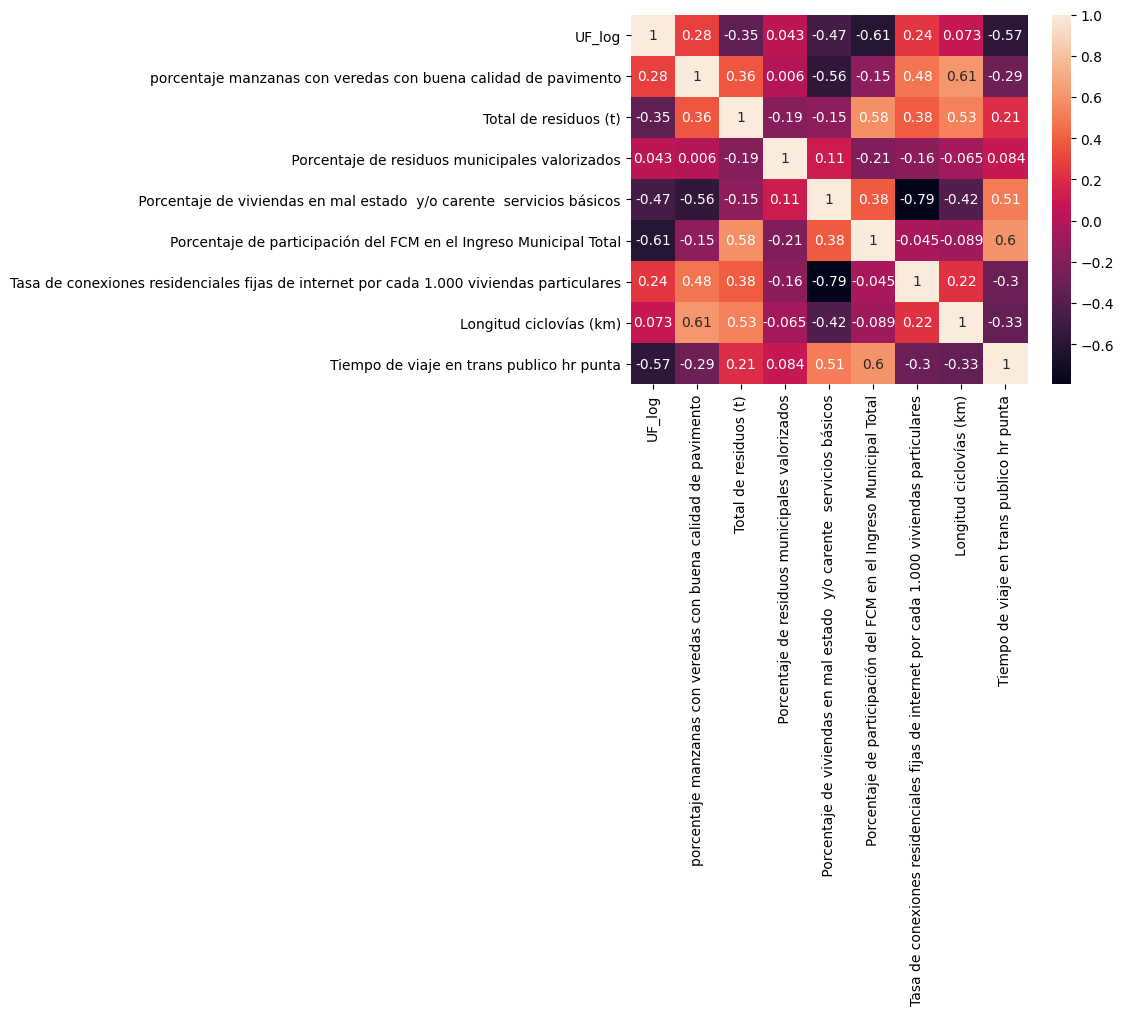

In [72]:
sns.heatmap(union[cols_to_plot4].corr(), annot=True)

In [73]:
cols_to_plot5 = ["UF_log",'Víctimas Robo con violencia o Intimidación',
       'Víctimas Robo por Sorpresa',
       ' Número de denuncias por delito en el espacio público cada 100 habitantes',
       ' Porcentaje de unidades vecinales que tienen entre 20% y 60% de hogares vulnerables',
       ' Porcentaje de la población en situación de pobreza (pobreza multidimensional MDSF)',
       'Porcentaje de Hacinamiento',
       'Porcentaje de viviendas con situación de allegamiento externo',
       ' Requerimiento de viviendas nuevas urbanas']

<AxesSubplot: >

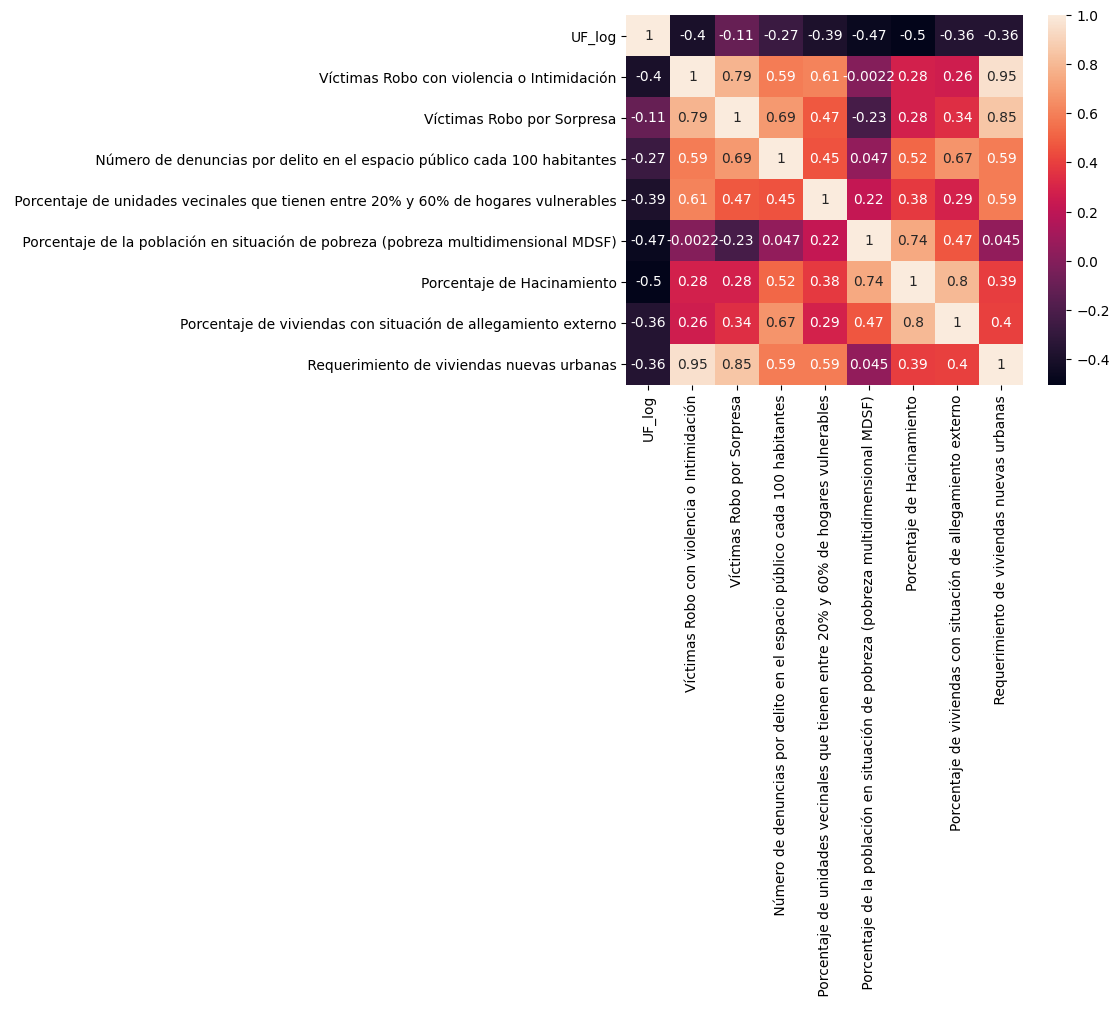

In [74]:
sns.heatmap(union[cols_to_plot5].corr(), annot=True)# podriamos eliminar el indice de robo por sorpresa,

## transformamos cada comuna en una variable 

In [75]:
# dummies_casa = pd.get_dummies(casas["Comuna"])#  estamos haciendo un nuevo dataframe de la columna  "Comuna", para que tengan el mismo peso y peudan ser consideradas en el modelo 
dummis_comunas = pd.get_dummies(union["Comuna"])
dummis_comunas.head(10)

,Buin,Cerrillos,Cerro Navia,Colina,Conchalí,El Bosque,El Monte,Estación Central,Huechuraba,Independencia,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
pd.concat([union, dummis_comunas], axis = 1)

,Comuna,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Publi,Precio,UF,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
0,Macul,94,340,4,2,0,0,03/12/2022,266395950,7650,...,0,0,0,0,0,0,0,0,0,0
66,Macul,128,128,2,1,0,1,22/11/2022,110000000,3158,...,0,0,0,0,0,0,0,0,0,0
85,Macul,144,221,4,2,0,3,21/11/2022,262913650,7550,...,0,0,0,0,0,0,0,0,0,0
105,Macul,81,160,3,1,0,3,10/11/2022,125000000,3589,...,0,0,0,0,0,0,0,0,0,0
233,Macul,321,249,7,7,1,2,03/12/2022,350911371,10077,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,Pirque,107,160,5,2,0,1,18/11/2022,123000000,3532,...,0,0,0,0,0,0,0,0,0,0
4809,Pirque,341,5000,3,2,0,0,18/11/2022,574579500,16500,...,0,0,0,0,0,0,0,0,0,0
4943,Pirque,90,140,5,2,0,2,07/11/2022,99000000,2842,...,0,0,0,0,0,0,0,0,0,0
4944,Pirque,75,130,3,1,0,1,07/11/2022,115000000,3302,...,0,0,0,0,0,0,0,0,0,0


## Unimos nuestras bases datos 

In [77]:
casas=pd.concat([union, dummis_comunas], axis = 1)
casas

,Comuna,m2_Construidos,m2_totales,Habitaciones,Banos,segunda_planta,Estacionamientos,Publi,Precio,UF,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
0,Macul,94,340,4,2,0,0,03/12/2022,266395950,7650,...,0,0,0,0,0,0,0,0,0,0
66,Macul,128,128,2,1,0,1,22/11/2022,110000000,3158,...,0,0,0,0,0,0,0,0,0,0
85,Macul,144,221,4,2,0,3,21/11/2022,262913650,7550,...,0,0,0,0,0,0,0,0,0,0
105,Macul,81,160,3,1,0,3,10/11/2022,125000000,3589,...,0,0,0,0,0,0,0,0,0,0
233,Macul,321,249,7,7,1,2,03/12/2022,350911371,10077,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,Pirque,107,160,5,2,0,1,18/11/2022,123000000,3532,...,0,0,0,0,0,0,0,0,0,0
4809,Pirque,341,5000,3,2,0,0,18/11/2022,574579500,16500,...,0,0,0,0,0,0,0,0,0,0
4943,Pirque,90,140,5,2,0,2,07/11/2022,99000000,2842,...,0,0,0,0,0,0,0,0,0,0
4944,Pirque,75,130,3,1,0,1,07/11/2022,115000000,3302,...,0,0,0,0,0,0,0,0,0,0


In [78]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 0 to 5174
Data columns (total 86 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      5298 non-null   object 
 1   m2_Construidos                                                                              5298 non-null   int64  
 2   m2_totales                                                                                  5298 non-null   int64  
 3   Habitaciones                                                                                5298 non-null   int64  
 4   Banos                                                                                       5298 non-null   int64  
 5   segunda_planta                           

## Debemos cambiar uint8  a int de cada una de las nuevas columnas, que son las comunas

In [79]:
le= LabelEncoder()


for i in casas.select_dtypes("uint8").keys(): # hemos cambiado  uint8  a int de cada una de las nuevas columnas, que son las comunas
    casas[i]=le.fit_transform(casas[i])

In [81]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5298 entries, 0 to 5174
Data columns (total 86 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Comuna                                                                                      5298 non-null   object 
 1   m2_Construidos                                                                              5298 non-null   int64  
 2   m2_totales                                                                                  5298 non-null   int64  
 3   Habitaciones                                                                                5298 non-null   int64  
 4   Banos                                                                                       5298 non-null   int64  
 5   segunda_planta                           

In [83]:
#casas.to_excel("data/analis_data.xlsx", index = False)